In [136]:
import pandas as pd
from collections import Counter
import numpy as np
from itertools import combinations

In [3]:
def createMatriz(dataFrame):
    values = []
    for i in range(len(dataFrame)):
        values.append([
             dataFrame.loc[i]["N1"], 
             dataFrame.loc[i]["N2"], 
             dataFrame.loc[i]["N3"], 
             dataFrame.loc[i]["N4"], 
             dataFrame.loc[i]["N5"],
             dataFrame.loc[i]["N6"]])
        
    return values

def createDict(init:int, end:int):
    dictCopy = {}
    for i in range(init, end):
        dictCopy[i] = 0

    return dictCopy

### A função frequenceNumber(listNumber, nReference), faz uma varredura nas linhas da matriz [listNumber], em busca do valor de referência (nReference) e calcula a frequência dos valores mais associados (presentes nos jogos) ao número solicitado. Ao final temos um dicionário com: 

~~~python 
[{
  1: 29,
  2: 23,
  3: 28,
  4: 21,
  5: 0,
 ...
}, 1285].
~~~
##### Obs: O próprio número obtém frequência 0, porém, ao final é retornado a frequência total do valor: neste caso para o valor nReference = 5, temos: 1285.

In [4]:
#
def frequenceNumber(listNumber: [], nReference: int):
    copy = createDict(1, 61)
    count = 0

    for y in range(len(listNumber)):
        if( nReference in listNumber[y] ):
            for x in range(len(listNumber[0])):
                if( listNumber[y][x] != nReference ):
                    copy[listNumber[y][x]] += 1
                    count += 1

    return [copy, count]

### A função selectMaxNumbers(dictNumber, outSide) tem como objetivo, retornar uma quantidade especifica de valores (outSide) associados que se deseja estudar do dicionário (dictNumber). Por exemplo:

~~~python
{13: 28, 48: 28, 53: 28, 4: 26, 27: 26, 33: 26, 42: 26}
~~~
#### Para o valor (outSide = 7), ele retorna os 7 valores mais frequentes associados ao valor chave.

In [5]:
def selectMaxNumbers(dictNumber: {}, outSide: int):
    n = {}

    for aux in range(outSide):
        for count in range(1, 61):
            if( dictNumber[count] == max(dictNumber.values()) and max(dictNumber.values()) != 0 ):
                n[count] = dictNumber[count]
                dictNumber[count] = 0
                break

    return n

In [27]:
ms = pd.read_excel('MegaSena_2.xlsx')
ms.head()

,Concurso,Data,N1,N2,N3,N4,N5,N6,Ganhadores,Premio,HouveGanhador
0,2669,16/12/2023,4,7,16,35,46,54,0,NaN,8163974.0
1,2668,14/12/2023,1,27,30,41,46,57,0,NaN,6123188.0
2,2667,12/12/2023,1,4,8,21,46,51,0,NaN,5403236.0
3,2666,09/12/2023,5,25,29,30,43,47,1,30781665.32,10479456.0
4,2665,07/12/2023,3,14,21,22,37,39,0,NaN,8471087.0


#### Verificando o percentual de ganhadores

In [28]:
df_ganhadores = ms['Ganhadores']

In [29]:
wins = df_ganhadores[(df_ganhadores != 0)]; loss = df_ganhadores[(df_ganhadores == 0)]

In [30]:
wins_freq = (wins.count()/df_ganhadores.count())*100; 
print("No total, %.3f%% dos sorteios houve 1 ganhador ou mais." % wins_freq)
print("Resultando em um percentual de %.3f%% de sorteios sem vencedores." % (100-wins_freq))

No total, 22.630% dos sorteios houve 1 ganhador ou mais.
Resultando em um percentual de 77.370% de sorteios sem vencedores.


In [49]:
df_ganhadores.mean()

0.3420756837766954

#### Pegando o numero de vencedores por concursos premiados

In [65]:
apenas_gfanhadores = df_ganhadores[df_ganhadores != 0]

In [64]:
print("De todos os sorteios houveram no mínimo {:.0f}, em média {:.3f} e no máximo {:.0f} ganhadores por sorteio prremiado.".format(apenas_gfanhadores.min(), apenas_gfanhadores.mean(), apenas_gfanhadores.max()))

De todos os sorteios houveram no mínimo 1, em média 1.512 e no máximo 52 ganhadores por sorteio prremiado.


## Unindo todos os valores jogados em uma única coluna

In [66]:
all_values = pd.concat([ms.N1, ms.N2, ms.N3, ms.N4, ms.N5, ms.N6])

## Agrupando os valores e verificando a frequência geral dos valores

In [67]:
all_values

0        4
1        1
2        1
3        5
4        3
        ..
2664    46
2665    59
2666    47
2667    49
2668    52
Length: 16014, dtype: int64

In [135]:
count = Counter(all_values.sort_values(ascending=True))

In [69]:
type(count)

collections.Counter

In [70]:
df = pd.DataFrame.from_dict(count, orient='index') #convertendo o objeto collections.Count em pd.DataFrame

In [71]:
df.head()

,0
1,256
2,268
3,248
4,283
5,297


In [72]:
df.columns = ['freq'] #renomeado a coluna da frequência

In [73]:
total = df['freq'].sum() #total de valores (daria no mesmo fazer (ms['Concurso'].count())/6 )
jogos = ms['Concurso'].count() #número total de jogos

In [74]:
total

16014

In [75]:
jogos

2669

#### Selecionando valores leatórios dentro dos 50 números mais sorteados

In [76]:
mydf = df.freq.sort_values(ascending=False).head(60).to_frame()
mydf.head()

,freq
10,311
53,306
5,297
37,289
23,287


In [77]:
#mydf.iloc[np.random.choice(np.arange(len(mydf)), 6, False)] #úmeros randomicos
mydf.loc[np.random.permutation(mydf.index)[:6]] #permutação

,freq
55,226
45,258
7,250
35,284
50,259
1,256


## Exibindo a frequência dos valores

In [79]:
import matplotlib.pyplot as plt

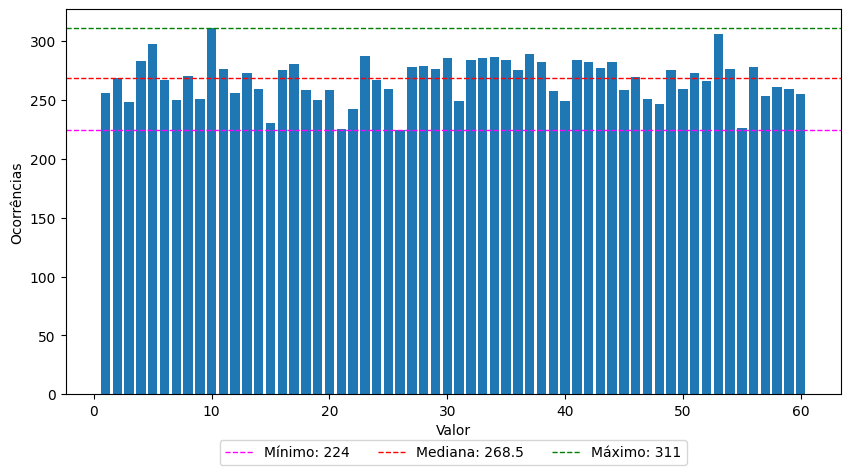

In [133]:
plt.figure(figsize=(10, 5))

plt.bar(count.keys(), count.values())
plt.xlabel('Valor')
plt.ylabel('Ocorrências')

min_value = min(count.values())
median_value = np.median(list(count.values()))
max_value = max(count.values())

plt.axhline(y=min_value, color='magenta', linestyle='dashed', linewidth=1, label=f'Mínimo: {min_value}')
plt.axhline(y=median_value, color='red', linestyle='dashed', linewidth=1, label=f'Mediana: {median_value}')
plt.axhline(y=max_value, color='green', linestyle='dashed', linewidth=1, label=f'Máximo: {max_value}')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()

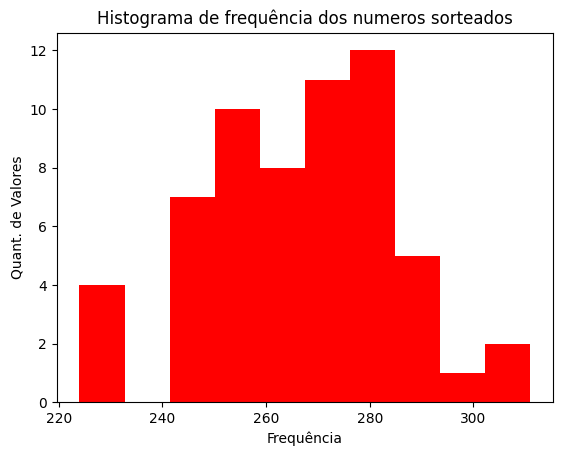

In [127]:
plt.hist(df["freq"], color='red', bins=10)
plt.title('Histograma de frequência dos numeros sorteados')
plt.xlabel('Frequência')
plt.ylabel('Quant. de Valores')

# Show graphic
plt.show()



In [113]:
df.describe()

,freq
count,60.000000
mean,266.900000
std,18.535079
min,224.000000
25%,255.750000
50%,268.500000
75%,280.500000
max,311.000000


<Axes: >

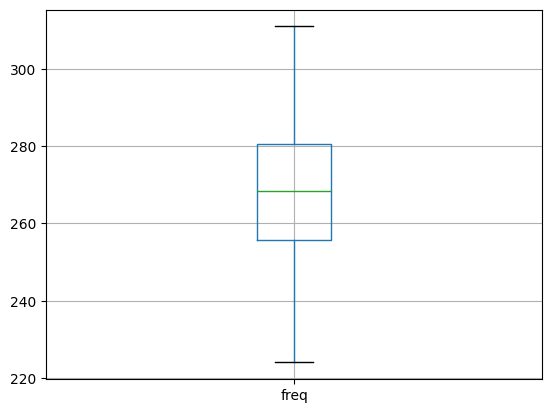

In [114]:
df.boxplot()

#### Exibindo uma relação dos 15 números mais sorteados, juntamente com a relação dos 10 números que mais aparecem em sorteios juntamente com o valor chave.

**Exemplo Ilustrativo de Frequência:**

Para o número 10, as ocorrências em ordem crescente de aparecimento são:

- Número 33: 37 vezes
- Número 5: 35 vezes

Isso significa que, ao analisar os sorteios do número 10, observamos que o número 33 apareceu 37 vezes, enquanto o número 5 apareceu 35 vezes, representando suas frequências respectivas.


In [184]:
rank = 15
proximos = 10

In [185]:
data = createMatriz(ms)
mostFrequenceValues = []
for i in range(rank):
    value = frequenceNumber(data, mydf.index[i])
    final = selectMaxNumbers(value[0], proximos)
    mostFrequenceValues.append({mydf.index[i]: final})
    print("%dº-" %(i+1),mydf.index[i], final)

1º- 10 {33: 37, 5: 35, 28: 34, 34: 33, 53: 32, 54: 32, 56: 32, 23: 31, 1: 30, 24: 30}
2º- 53 {38: 39, 23: 38, 36: 38, 41: 35, 8: 33, 10: 32, 55: 32, 6: 31, 13: 31, 17: 31}
3º- 5 {27: 37, 11: 36, 33: 36, 10: 35, 24: 34, 1: 33, 23: 33, 18: 31, 3: 30, 25: 30}
4º- 37 {12: 34, 11: 32, 43: 32, 1: 31, 10: 30, 34: 30, 38: 30, 39: 30, 58: 30, 6: 29}
5º- 23 {53: 38, 30: 36, 5: 33, 51: 33, 10: 31, 47: 31, 8: 30, 29: 30, 3: 29, 49: 29}
6º- 34 {6: 35, 10: 33, 16: 31, 5: 30, 37: 30, 45: 30, 53: 30, 19: 29, 31: 29, 8: 28}
7º- 33 {10: 37, 5: 36, 32: 32, 42: 32, 8: 31, 24: 30, 36: 30, 48: 30, 6: 29, 11: 29}
8º- 30 {23: 36, 18: 34, 35: 33, 8: 32, 11: 31, 14: 31, 52: 31, 4: 30, 25: 29, 32: 29}
9º- 35 {2: 33, 30: 33, 32: 32, 39: 31, 5: 30, 14: 30, 16: 30, 29: 30, 6: 29, 43: 29}
10º- 32 {12: 32, 33: 32, 35: 32, 8: 31, 28: 31, 40: 31, 5: 30, 10: 30, 38: 30, 48: 30}
11º- 41 {9: 36, 58: 36, 53: 35, 25: 33, 42: 33, 13: 32, 27: 31, 49: 31, 19: 28, 23: 28}
12º- 4 {38: 34, 52: 33, 29: 32, 27: 31, 44: 31, 56: 31, 

In [132]:
t = mostFrequenceValues[0].values()
a = list(t)
a = list(a[0].keys())
a.append(list(mostFrequenceValues[0].keys())[0])

for z in range(7):
    for i in range(2):
        print(list(mostFrequenceValues[z].keys())[0],"-", np.random.permutation(a)[:6])

10 - [54 53 56 33  1 10]
10 - [56 24 28 23 33 10]
53 - [28 10  5 56 53 24]
53 - [28 56  1  5 10 23]
5 - [53 34  5 33 28  1]
5 - [24 54 33 28 34  5]
37 - [53 28 34  1 24 23]
37 - [34 24 54 23 56  5]
23 - [28  5  1 53 10 24]
23 - [34  5  1 28 56 10]
34 - [56  1 23 33  5 28]
34 - [33 28 34  5  1 24]
33 - [ 1  5 56 33 23 24]
33 - [ 5 24 23 28 53 34]


## Aparições em sorteios

In [181]:
# Conjunto de 6 números que você quer verificar
conjunto_alvo = {1, 5, 11, 16, 20, 56}  
df_ms = ms

def verifica_sequencia_alvo(row):
    numeros_sorteio = set(row[['N1', 'N2', 'N3', 'N4', 'N5', 'N6']])
    return conjunto_alvo == numeros_sorteio

df_ms['Sequencia_Alvo'] = df_ms.apply(verifica_sequencia_alvo, axis=1)

resultados = df_ms[df_ms['Sequencia_Alvo']]

print(resultados[['Concurso', 'Sequencia_Alvo']])

      Concurso  Sequencia_Alvo
1004      1665            True
